# Final

## In this milestone:
1. Models:
- K-Means with different parameters
- k-medoids
- AgglomerativeClustering (linkage = ["single", "complete, "average", "centroid, "ward"])
- DBSCAN with different eps, min_samples, metric
- GMM
2. PCA/TSNE

## Importing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns

np.random.seed = 42

df=pd.read_csv('../data/for_modellers/after_scaling.csv')

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
seed=42

It was compiling all night and still nothing, so we'll work on smaller samples.

In [7]:
sample_df = df.sample(n=10000, random_state=42)

## 1. KMeans

### 1.1 eps

In [4]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=seed)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1
        scores.append(wcss)
    return scores

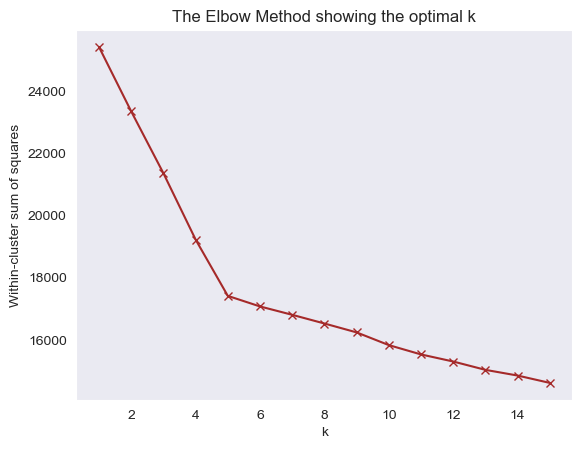

In [17]:
wcss_vec = count_wcss_scores(sample_df, 15)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'x-', color = "brown")
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

In [9]:
from sklearn.metrics import silhouette_score
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k, random_state = seed)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

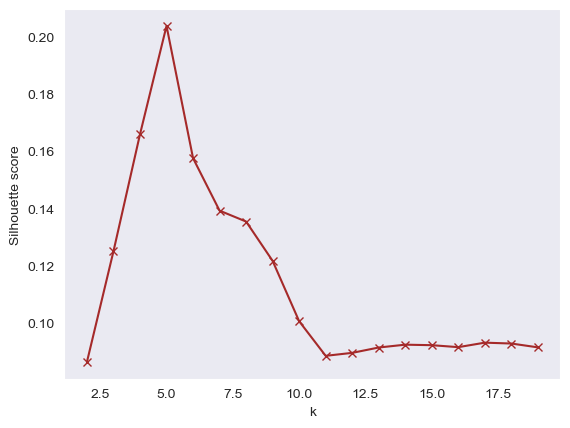

In [19]:
cluster_num_seq = range(2, 20)
silhouette_vec = count_clustering_scores(sample_df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'x-', color = "brown")
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

In [20]:
def metrics_plots(df,max_k=20):

    score = []

    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(df)
        score.append(kmeans.score(df))
        score_kmeans_c.append(calinski_harabasz_score(df, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(df, predictions))

    list_scores = [score, score_kmeans_c, score_kmeans_d] 
    list_title = ['Within-cluster sum of squares', 'Calinski Harabasz', 'Davies Bouldin'] 
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')
        plt.show()

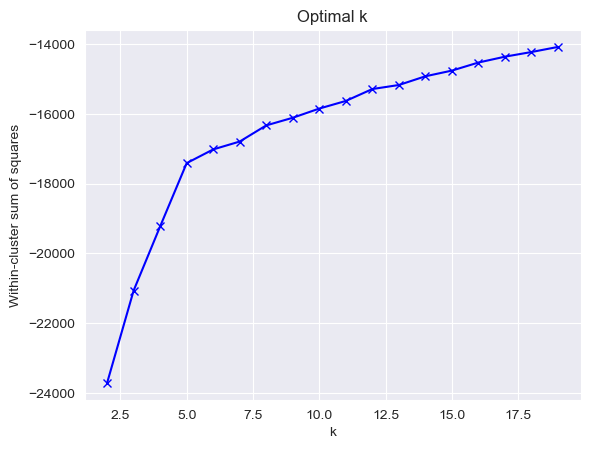

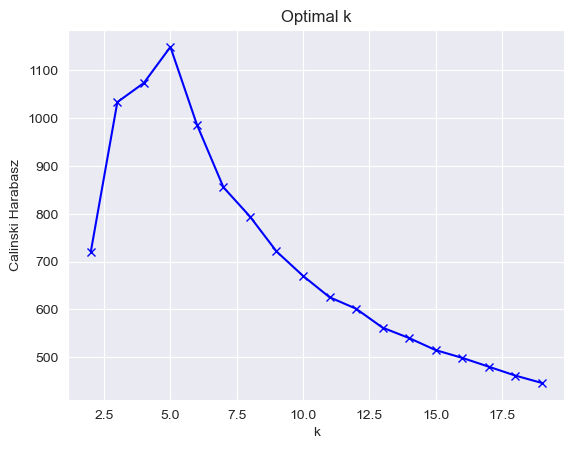

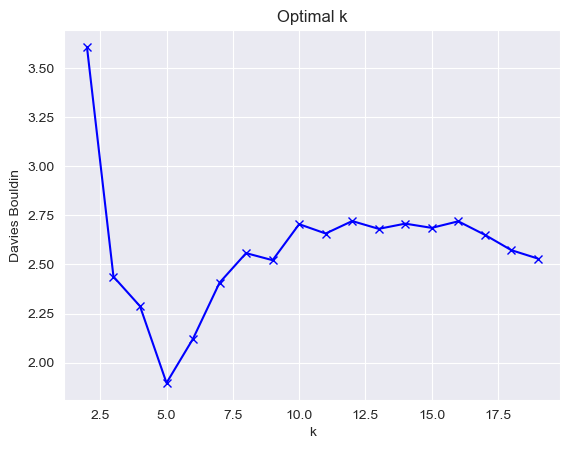

In [21]:
metrics_plots(sample_df,20)

According to all metrics, we should have n_clusters=5.

### 1.2 different parameters

In [22]:
def evaluate_kmeans(X, init_methods, algorithms):
    results = []

    for alg in algorithms:
        for init in init_methods:
            kmeans = KMeans(n_clusters=5, init=init, algorithm = alg, random_state=42)
            labels = kmeans.fit_predict(X)

            inertia = kmeans.inertia_
            ch_score = calinski_harabasz_score(X, labels)
            db_score = davies_bouldin_score(X, labels)
            silhouette_avg = silhouette_score(X, labels)

            results.append({
                'algorithm': alg,
                'init': init,
                'inertia': inertia,
                'calinski_harabasz': ch_score,
                'davies_bouldin': db_score,
                'silhouette': silhouette_avg
            })

    return results

init_methods = ['k-means++', 'random']
algorithms = ['lloyd', 'elkan']

results = evaluate_kmeans(sample_df, init_methods, algorithms)

import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)


  algorithm       init       inertia  calinski_harabasz  davies_bouldin  \
0     lloyd  k-means++  17414.687779        1149.033353        1.895746   
1     lloyd     random  17414.679444        1149.034479        1.897294   
2     elkan  k-means++  17414.687779        1149.033353        1.895746   
3     elkan     random  17414.679444        1149.034479        1.897294   

   silhouette  
0    0.203611  
1    0.203618  
2    0.203611  
3    0.203618  


algorithm doesn't change scores, kmeans++ and random give similar scores too. Chosen parameters for K-Means: n_clusters=5, init="k_means++" 

## 2. K-medoids

In [12]:
import sklearn_extra

In [13]:
from sklearn_extra.cluster import KMedoids

In [51]:
def plot_kmedoids_clusters(X, n_clusters):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    kmedoids.fit(X)
    y_kmedoids = kmedoids.predict(X)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmedoids, s=30, cmap='viridis')

    centers = kmedoids.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-medoids clusters')
    plt.show()

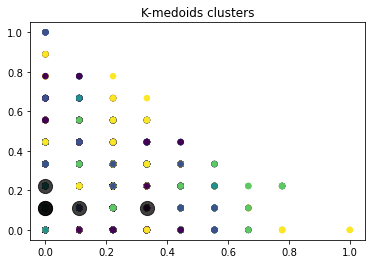

In [52]:
plot_kmedoids_clusters(sample_df,5)

In [41]:
def metrics_plots_medoids(df, max_k=20):

    score_kmedoids_c = []
    score_kmedoids_d = []

    for k in range(2, max_k):
        kmedoids = KMedoids(n_clusters=k, random_state=101)
        predictions = kmedoids.fit_predict(df)
        score_kmedoids_c.append(calinski_harabasz_score(df, kmedoids.labels_))
        score_kmedoids_d.append(davies_bouldin_score(df, predictions))

    list_scores = [score_kmedoids_c, score_kmedoids_d] 
    list_title = ['Calinski Harabasz', 'Davies Bouldin'] 

    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')
        plt.show()

In [46]:
kmedoids = KMedoids(n_clusters=5, random_state=42)
predictions = kmedoids.fit_predict(sample_df)
print(silhouette_score(sample_df, predictions))

0.06184439670426957


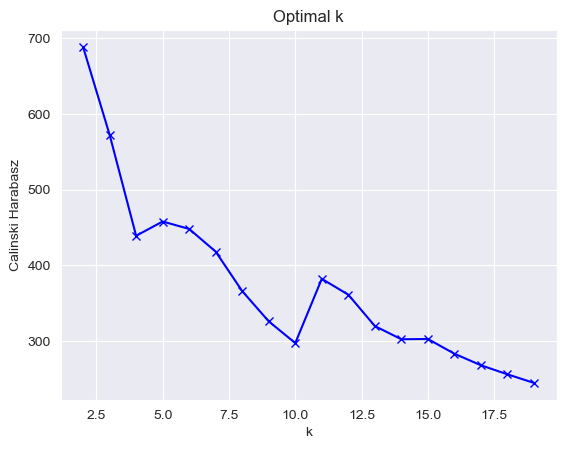

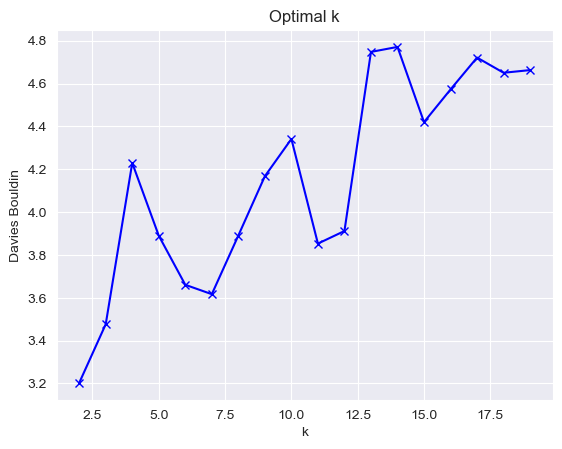

In [34]:
metrics_plots_medoids(sample_df)

the best parameters: n_components=5,7,11,15. Let's use silhouette score

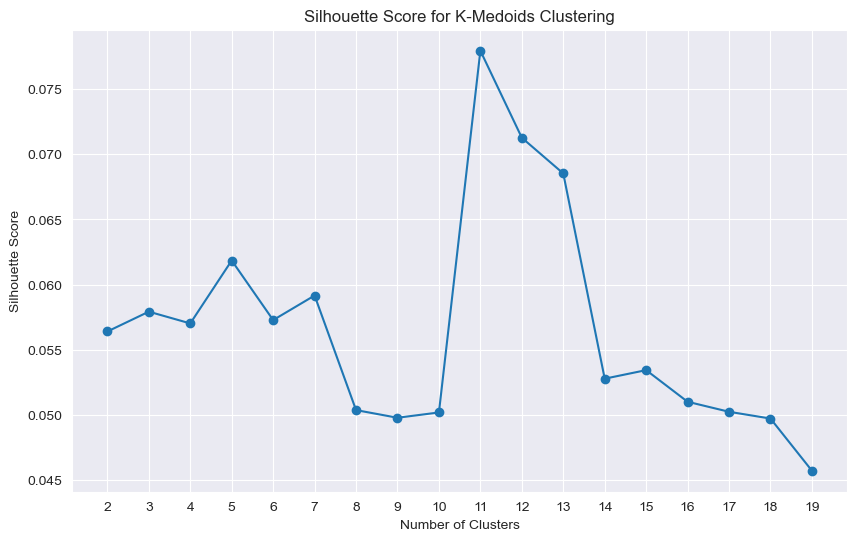

In [35]:
n_clusters_range = range(2, 20)
silhouette_scores = []
for n_clusters in n_clusters_range:
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    labels = kmedoids.fit_predict(sample_df)
    score = silhouette_score(sample_df, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for K-Medoids Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()



The best n_components=11.

## 1.3 AgglomerativeClustering

In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from matplotlib.ticker import MaxNLocator

In [7]:
linkages = ['ward', 'complete', 'average', 'single']

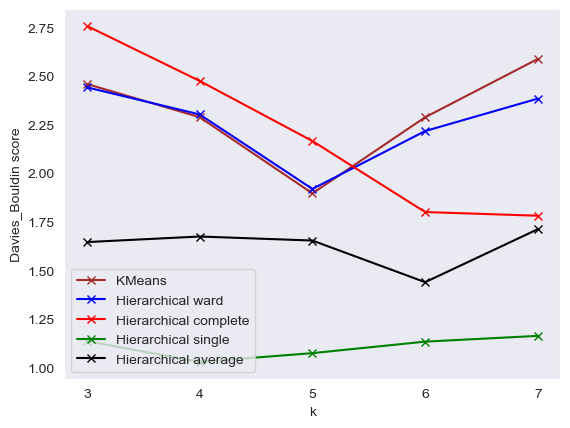

In [10]:
cluster_num_seq = range(3, 8)
davies_vec_kmeans = count_clustering_scores(sample_df, cluster_num_seq, KMeans, davies_bouldin_score)
davies_vec_hierarchical = {'ward': [], 'complete': [], 'average': [], 'single': []}
for linkage in linkages:
    for k in cluster_num_seq:
        model_instance = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = model_instance.fit_predict(sample_df)
        wcss = davies_bouldin_score(sample_df, labels)
        davies_vec_hierarchical[linkage].append(wcss)

ax = plt.figure().gca()
plt.plot(cluster_num_seq, davies_vec_kmeans, 'x-', color = "brown", label="KMeans")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(cluster_num_seq, davies_vec_hierarchical['ward'], 'x-', color = "blue", label="Hierarchical ward")
plt.plot(cluster_num_seq, davies_vec_hierarchical['complete'], 'x-', color = "red", label="Hierarchical complete")
plt.plot(cluster_num_seq, davies_vec_hierarchical['single'], 'x-', color = "green", label="Hierarchical single")
plt.plot(cluster_num_seq, davies_vec_hierarchical['average'], 'x-', color = "black", label="Hierarchical average")
plt.xlabel('k')
plt.ylabel('Davies_Bouldin score')
plt.legend(loc="lower left")
plt.grid()
plt.savefig("output.jpg")
plt.show()

Here the best one is linkage="single" with n_clusters=4 and linkage="average" with k=6.

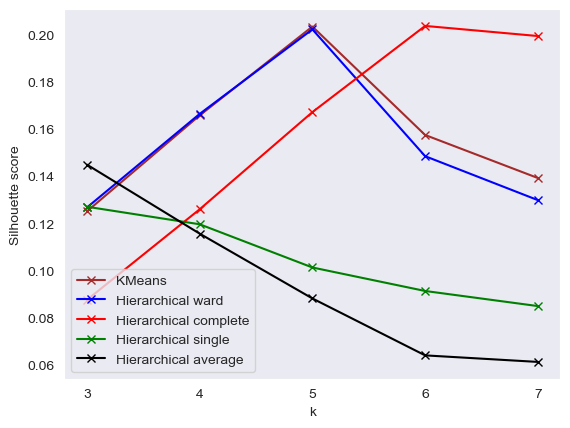

In [11]:
# silhouette_score
cluster_num_seq = range(3, 8)
silhouette_vec_kmeans = count_clustering_scores(sample_df, cluster_num_seq, KMeans, silhouette_score)
silhouette_vec_hierarchical = {'ward': [], 'complete': [], 'average': [], 'single': []}
for linkage in linkages:
    for k in cluster_num_seq:
        model_instance = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = model_instance.fit_predict(sample_df)
        wcss = silhouette_score(sample_df, labels)
        silhouette_vec_hierarchical[linkage].append(wcss)

ax = plt.figure().gca()
plt.plot(cluster_num_seq, silhouette_vec_kmeans, 'x-', color = "brown", label="KMeans")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(cluster_num_seq, silhouette_vec_hierarchical['ward'], 'x-', color = "blue", label="Hierarchical ward")
plt.plot(cluster_num_seq, silhouette_vec_hierarchical['complete'], 'x-', color = "red", label="Hierarchical complete")
plt.plot(cluster_num_seq, silhouette_vec_hierarchical['single'], 'x-', color = "green", label="Hierarchical single")
plt.plot(cluster_num_seq, silhouette_vec_hierarchical['average'], 'x-', color = "black", label="Hierarchical average")
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.legend(loc="lower left")
plt.grid()
plt.savefig("output2.jpg")
plt.show()

According to silhouette score the best are KMeans with k=5 and hierarchical with parameters: linkage=ward and k=5, linkage=complete and k=6(average with k=6 is the worst, it was the best in davies bouldin score)

## 1.4 DBSCAN

In [15]:
from sklearn.cluster import DBSCAN

In [13]:
df.head()

,awayScore,homeScore,matchWeek,aerials_lost,aerials_won,age,assisted_shots,assists,ball_recoveries,blocked_shots,...,middle_schema_away,strikers_schema_away,matchYear,matchMonth,championship_name_bundesliga,championship_name_liga,championship_name_ligue 1,championship_name_premier league,championship_name_seria a,championship_name_unknown
0,0.444444,0.111111,0.918919,0.000000,0.000000,0.321429,0.000,0.0,0.035714,0.0,...,0.333333,0.5,1.0,0.363636,0.0,0.0,0.0,0.0,1.0,0.0
1,0.444444,0.000000,0.459459,0.000000,0.066667,0.178571,0.000,0.0,0.392857,0.0,...,0.666667,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.405405,0.000000,0.066667,0.285714,0.125,0.0,0.357143,0.0,...,0.666667,0.5,1.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0
3,0.222222,0.222222,0.243243,0.000000,0.066667,0.464286,0.000,0.0,0.571429,0.0,...,0.666667,0.0,0.0,0.818182,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.222222,0.297297,0.157895,0.000000,0.321429,0.000,0.0,0.214286,0.0,...,0.666667,0.0,1.0,0.909091,1.0,0.0,0.0,0.0,0.0,0.0


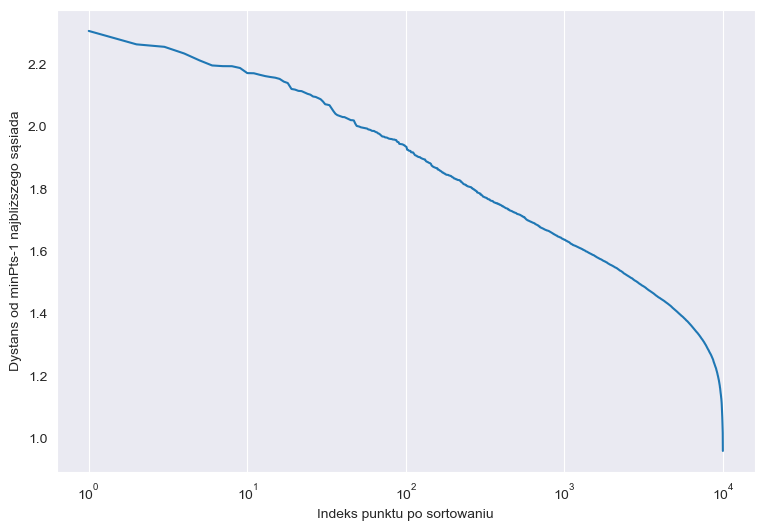

In [16]:
minPts = 162 #2*nr of columns
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(sample_df)
distances, indices = nbrs.kneighbors(sample_df)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel('Dystans od minPts-1 najbliższego sąsiada')
ax1.plot(list(range(1,sample_df.shape[0]+1)), distanceDec)

plt.xscale('log')
plt.grid(axis='y')

plt.show()

eps = 2.2-2.05 or 1.7-1.9 or 1.2-1.4, let's test which is the best

In [19]:
# List of parameters to test
eps_list = [2.05, 2.1, 2.2, 2.15, 1.7, 1.75, 1.8, 1.85,1.9, 1.2, 1.25, 1.3, 1.35, 1.4]
metric_list = ['euclidean', 'manhattan']
best_score=-1
results = []
for eps in eps_list:
    for metric in metric_list:
        dbscan = DBSCAN(eps=eps, min_samples=162, metric=metric)
        labels = dbscan.fit_predict(sample_df)
        # ignorowanie wynikow z jednym klastrem
        if len(np.unique(labels)) > 1:
            score = silhouette_score(sample_df, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_metric = metric

print(f"Best score: {best_score}, eps: {best_eps}, best_metric: {best_metric}")

Best score: 0.21058798216846472, eps: 1.9, best_metric: euclidean


Let's check Davies-Bouldin score:

In [26]:
# List of parameters to test
eps_list = [2.05, 2.1, 2.2, 2.15, 1.7, 1.75, 1.8, 1.85, 1.9, 1.2, 1.25, 1.3, 1.35, 1.4]
metric_list = ['euclidean', 'manhattan']

best_score = float('inf') 
best_eps = None
best_metric = None

results = []

# Loop through all combinations of eps and metric
for eps in eps_list:
    for metric in metric_list:
        dbscan = DBSCAN(eps=eps, min_samples=162, metric=metric)
        labels = dbscan.fit_predict(sample_df)

        # Ignore results with only one cluster
        if len(np.unique(labels)) > 1:
            score = davies_bouldin_score(sample_df, labels)
            results.append((eps, metric, score))
            if score < best_score:  # For Davies-Bouldin, lower is better
                best_score = score
                best_eps = eps
                best_metric = metric

# Print the best score and parameters
print(f"Best score: {best_score}, eps: {best_eps}, best_metric: {best_metric}")

# Print all results
for eps, metric, score in results:
    print(f"eps: {eps}, metric: {metric}, score: {score}")


Best score: 0.6705863209375882, eps: 1.9, best_metric: euclidean
eps: 1.7, metric: euclidean, score: 3.1496654880657156
eps: 1.75, metric: euclidean, score: 2.543947907220629
eps: 1.8, metric: euclidean, score: 1.7726335490316234
eps: 1.85, metric: euclidean, score: 1.3662301023524248
eps: 1.9, metric: euclidean, score: 0.6705863209375882
eps: 1.2, metric: euclidean, score: 2.4568534941061304
eps: 1.25, metric: euclidean, score: 2.6852016280687945
eps: 1.3, metric: euclidean, score: 2.786043061100937
eps: 1.35, metric: euclidean, score: 2.813026221542321
eps: 1.4, metric: euclidean, score: 2.818485297690317


Same best parameters as in silhouette score. The best parameters for DBSCAN: min_samples=162, eps=1.9, best_metric=euclidean.

## 1.5 GMM

In [25]:
from sklearn.mixture import GaussianMixture


# List of parameters to test
n_components_list = range(2, 20)
covariance_type_list = ['full', 'tied', 'diag', 'spherical']

best_score = -1
best_n_components = None
best_covariance_type = None

# Loop through all combinations of n_components and covariance_type
for n_components in n_components_list:
    for covariance_type in covariance_type_list:
        # Fit Gaussian Mixture Model
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
        labels = gmm.fit_predict(sample_df)

        # Calculate the silhouette score for the GMM
        score = silhouette_score(sample_df, labels)

        # Update best parameters if the current score is better
        if score > best_score:
            best_score = score
            best_n_components = n_components
            best_covariance_type = covariance_type

print(f"Best Score of Gaussian Mixture Model: {best_score}, best_covariance_type: {best_covariance_type}, best_n_components: {best_n_components}")



Best Score of Gaussian Mixture Model: 0.2036488014830243, best_covariance_type: full, best_n_components: 5


The best parameters for GMM:

Now let's check Davies-Boulkin score:

In [27]:
# List of parameters to test
n_components_list = range(2, 20)
covariance_type_list = ['full', 'tied', 'diag', 'spherical']

best_score = float('inf')  # For Davies-Bouldin, lower is better
best_n_components = None
best_covariance_type = None

# Loop through all combinations of n_components and covariance_type
for n_components in n_components_list:
    for covariance_type in covariance_type_list:
        # Fit Gaussian Mixture Model
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
        labels = gmm.fit_predict(sample_df)

        # Calculate the Davies-Bouldin score for the GMM
        score = davies_bouldin_score(sample_df, labels)

        # Update best parameters if the current score is better
        if score < best_score:  # For Davies-Bouldin, lower is better
            best_score = score
            best_n_components = n_components
            best_covariance_type = covariance_type

print(f"Best Score of Gaussian Mixture Model: {best_score}, best_covariance_type: {best_covariance_type}, best_n_components: {best_n_components}")


Best Score of Gaussian Mixture Model: 1.8335796961719568, best_covariance_type: tied, best_n_components: 6


According to the metrics we looked at, the best results are given by:

-KMeans with parameters: n_clusters=5, init="k_means++"  

-AgglomerativeClustering with parameters: linkage="single" with n_clusters=4, linkage="average" with k=6, linkage=ward and k=5, linkage=complete and k=6

-GMM with: covariance_type: full, n_components: 5, covariance_type: tied, n_components: 6

-DBSCAN with: min_samples=162, eps=1.9, best_metric=euclidean

-KMedoids with n_components=11

Let's compare these models with each other to choose the best one for our task:

In [37]:
# KMeans model
kmeans = KMeans(n_clusters=5, init='k-means++')

# AgglomerativeClustering models
agglo_single = AgglomerativeClustering(n_clusters=4, linkage='single')
agglo_average = AgglomerativeClustering(n_clusters=6, linkage='average')
agglo_ward = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglo_complete = AgglomerativeClustering(n_clusters=6, linkage='complete')

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, covariance_type='full')
gmm = GaussianMixture(n_components=6, covariance_type='tied')

# DBSCAN model
dbscan = DBSCAN(min_samples=162, eps=1.9, metric='euclidean')

#KMedoids model
kmedoids=KMedoids(n_clusters=11)


In [38]:
# Fit and predict labels for KMeans
kmeans_labels = kmeans.fit_predict(sample_df)

# Fit and predict labels for AgglomerativeClustering
agglo_single_labels = agglo_single.fit_predict(sample_df)
agglo_average_labels = agglo_average.fit_predict(sample_df)
agglo_ward_labels = agglo_ward.fit_predict(sample_df)
agglo_complete_labels = agglo_complete.fit_predict(sample_df)

# Fit and predict labels for GMM
gmm_labels = gmm.fit_predict(sample_df)

# Fit and predict labels for DBSCAN
dbscan_labels = dbscan.fit_predict(sample_df)

# Fit and predict labels for KMedoids
kmedoids_labels = kmedoids.fit_predict(sample_df)

In [38]:
def compute_metrics(X, labels):
    db_score = davies_bouldin_score(X, labels)
    sil_score = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    return db_score, sil_score, ch_score

# Initialize a dictionary to hold the results
results = {}

# Calculate metrics for each model
results['KMeans'] = compute_metrics(sample_df, kmeans_labels)
results['KMedoids'] = compute_metrics(sample_df, kmedoids_labels)
results['Agglo Single'] = compute_metrics(sample_df, agglo_single_labels)
results['Agglo Average'] = compute_metrics(sample_df, agglo_average_labels)
results['Agglo Ward'] = compute_metrics(sample_df, agglo_ward_labels)
results['Agglo Complete'] = compute_metrics(sample_df, agglo_complete_labels)
results['GMM'] = compute_metrics(sample_df, gmm_labels)
if len(np.unique(dbscan_labels)) > 1:  # Ignore DBSCAN results with only one cluster
    results['DBSCAN'] = compute_metrics(sample_df, dbscan_labels)
else:
    results['DBSCAN'] = ('N/A', 'N/A', 'N/A')


In [39]:
# Print the results
for model, (db_score, sil_score, ch_score) in results.items():
    print(f"{model}:")
    print(f"  Davies-Bouldin Score: {db_score}")
    print(f"  Silhouette Score: {sil_score}")
    print(f"  Calinski-Harabasz Score: {ch_score}")
    print()


KMeans:
  Davies-Bouldin Score: 1.8892194436235332
  Silhouette Score: 0.20355796043048519
  Calinski-Harabasz Score: 1148.7985364809376

KMedoids:
  Davies-Bouldin Score: 3.8528234227662836
  Silhouette Score: 0.07794237782261709
  Calinski-Harabasz Score: 382.36173013392136

Agglo Single:
  Davies-Bouldin Score: 1.0294780511768082
  Silhouette Score: 0.11951487284266793
  Calinski-Harabasz Score: 3.3578782478481553

Agglo Average:
  Davies-Bouldin Score: 1.439393701274989
  Silhouette Score: 0.06375198849356853
  Calinski-Harabasz Score: 9.469614438409497

Agglo Ward:
  Davies-Bouldin Score: 1.9185543732610761
  Silhouette Score: 0.20242069570296434
  Calinski-Harabasz Score: 1139.7572138685257

Agglo Complete:
  Davies-Bouldin Score: 1.7998262197462356
  Silhouette Score: 0.20388423055880442
  Calinski-Harabasz Score: 929.1543882694888

GMM:
  Davies-Bouldin Score: 2.1161524389373447
  Silhouette Score: 0.16317469126810555
  Calinski-Harabasz Score: 972.6720362873791

DBSCAN:
  Davi

In [48]:
# Create a DataFrame to display the results
results_df = pd.DataFrame(results, index=['Davies-Bouldin Score', 'Silhouette Score', 'Calinski-Harabasz Score']).T

# Print the DataFrame
print(results_df)


                Davies-Bouldin Score  Silhouette Score  \
KMeans                      1.889219          0.203558   
KMedoids                    3.852823          0.077942   
Agglo Single                1.029478          0.119515   
Agglo Average               1.439394          0.063752   
Agglo Ward                  1.918554          0.202421   
Agglo Complete              1.799826          0.203884   
GMM                         2.116152          0.163175   
DBSCAN                      0.670586          0.210588   

                Calinski-Harabasz Score  
KMeans                      1148.798536  
KMedoids                     382.361730  
Agglo Single                   3.357878  
Agglo Average                  9.469614  
Agglo Ward                  1139.757214  
Agglo Complete               929.154388  
GMM                          972.672036  
DBSCAN                         2.202696  


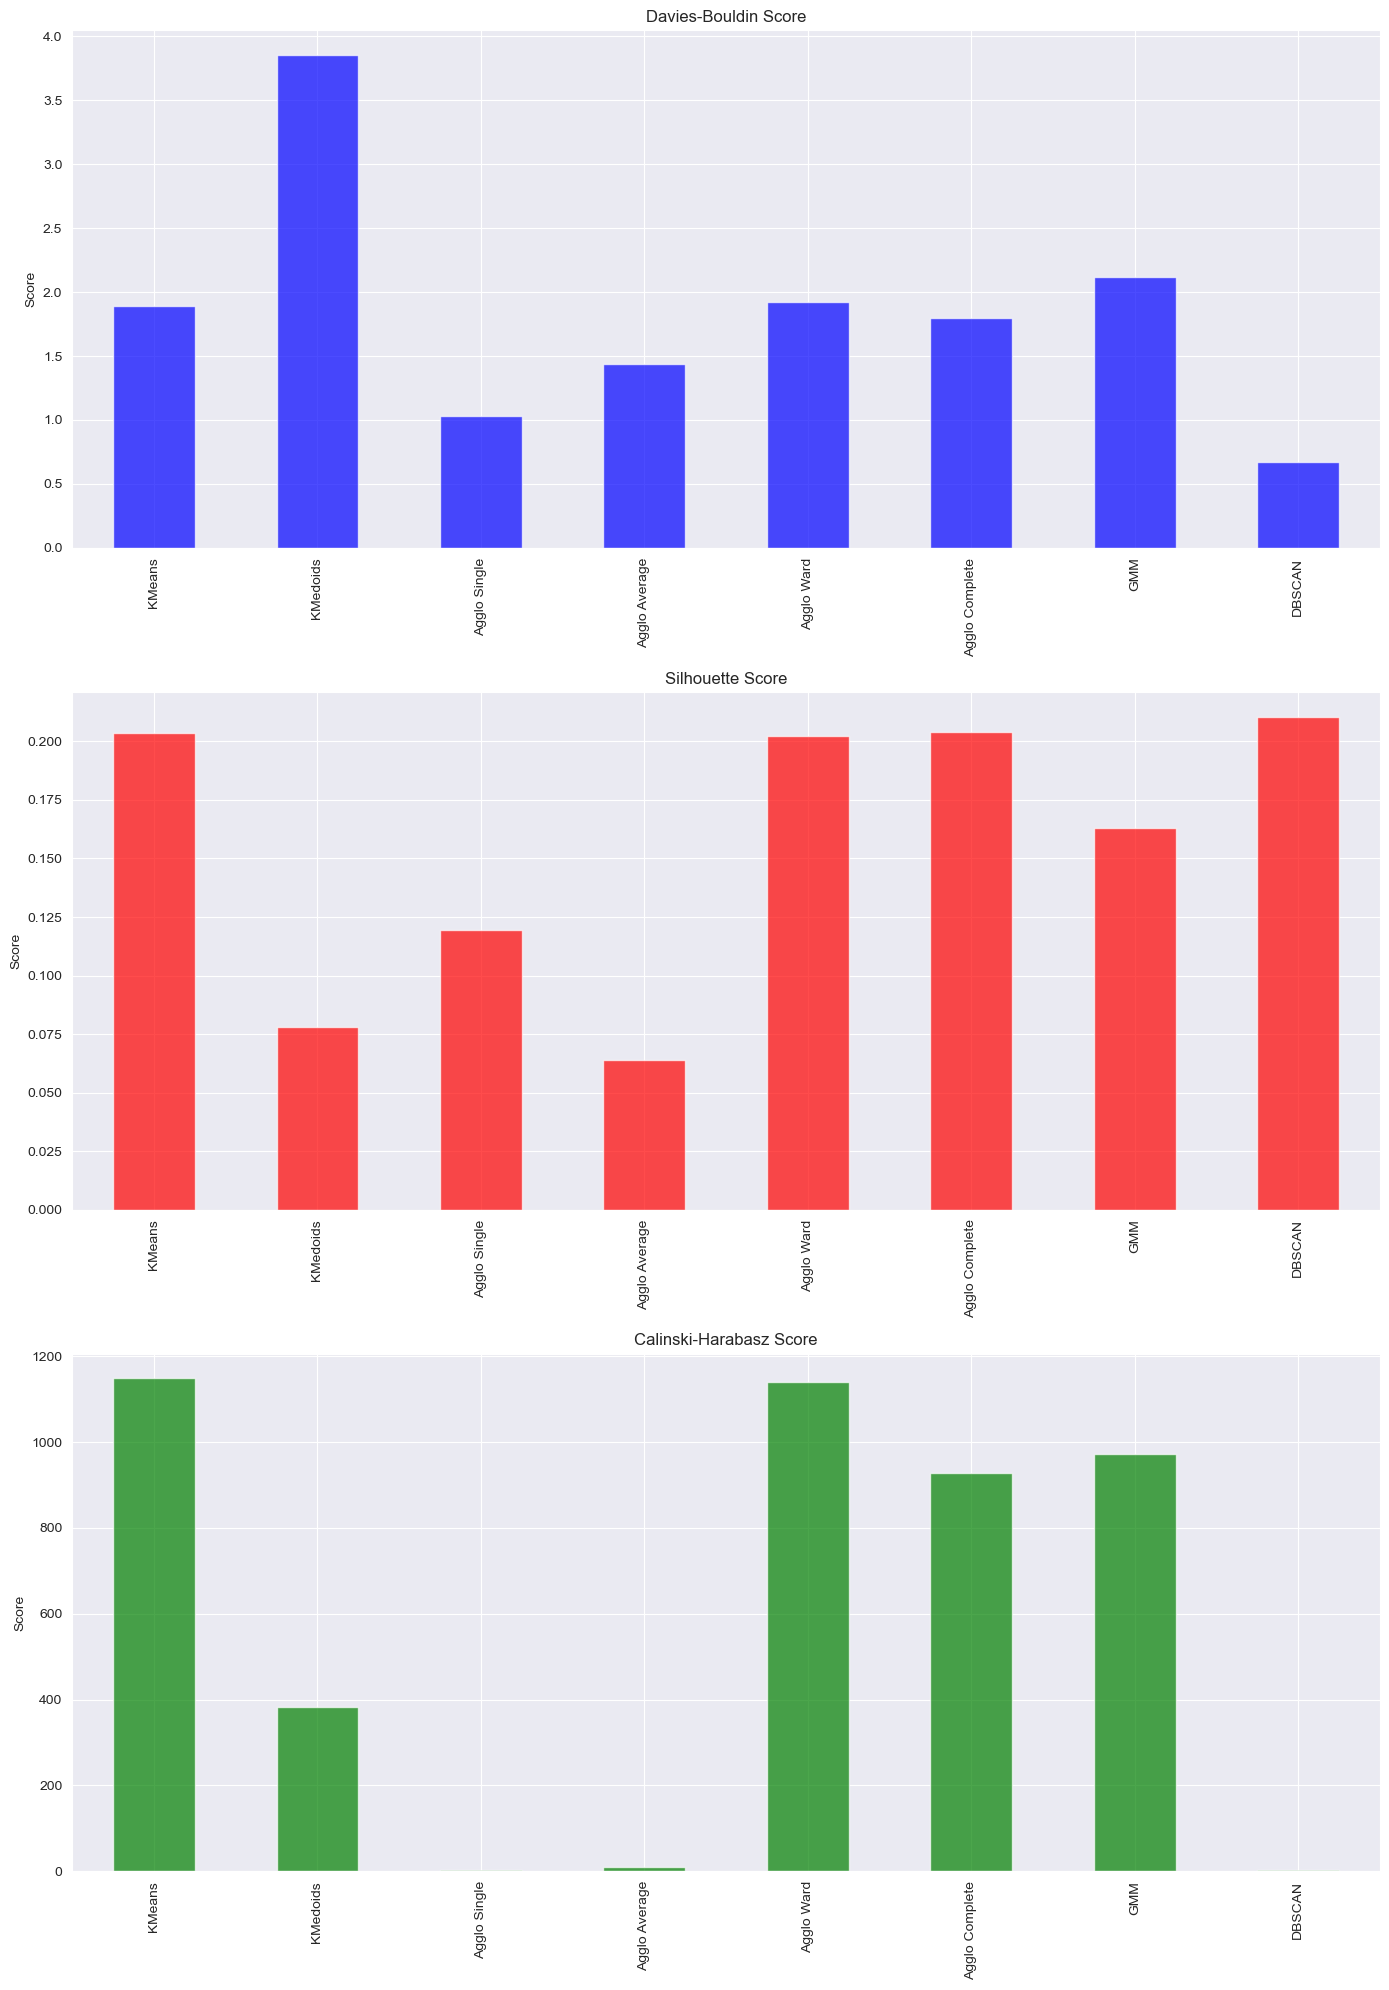

In [50]:
# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(14, 20))

# Plot Davies-Bouldin Score
results_df['Davies-Bouldin Score'].plot(kind='bar', ax=axs[0], color='b', alpha=0.7)
axs[0].set_title('Davies-Bouldin Score')
axs[0].set_ylabel('Score')

# Plot Silhouette Score
results_df['Silhouette Score'].plot(kind='bar', ax=axs[1], color='r', alpha=0.7)
axs[1].set_title('Silhouette Score')
axs[1].set_ylabel('Score')

# Plot Calinski-Harabasz Score
results_df['Calinski-Harabasz Score'].plot(kind='bar', ax=axs[2], color='g', alpha=0.7)
axs[2].set_title('Calinski-Harabasz Score')
axs[2].set_ylabel('Score')

plt.tight_layout()
plt.show()


Davies-Bouldin - the lower the better
silhouette and calinski-harabasz - the higher the better

Our choice will be KMeans or Aggo ward. Let's make visualizations.

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
result = pca.fit_transform(sample_df)

C:\Users\micha\AppData\Local\Temp\ipykernel_23488\4242799544.py:1: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = kmeans_labels[:], palette=sns.color_palette("hls", 8))


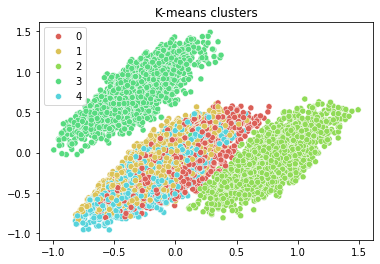

In [54]:
sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = kmeans_labels[:], palette=sns.color_palette("hls", 8))
plt.title('K-means clusters')
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_23488\3818477301.py:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = agglo_single_labels[:], palette=sns.color_palette("hls", 8))


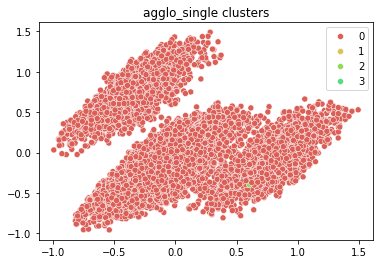

In [55]:
sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = agglo_single_labels[:], palette=sns.color_palette("hls", 8))
plt.title('agglo_single clusters')
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_23488\718887076.py:1: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = agglo_average_labels[:], palette=sns.color_palette("hls", 8))


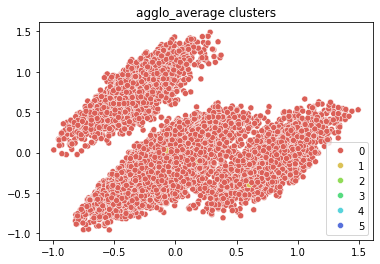

In [56]:
sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = agglo_average_labels[:], palette=sns.color_palette("hls", 8))
plt.title('agglo_average clusters')
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_23488\1617571220.py:1: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = agglo_ward_labels[:], palette=sns.color_palette("hls", 8))


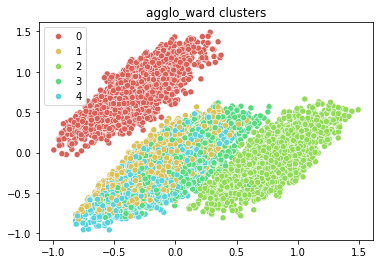

In [57]:
sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = agglo_ward_labels[:], palette=sns.color_palette("hls", 8))
plt.title('agglo_ward clusters')
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_23488\299056510.py:1: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = agglo_complete_labels[:], palette=sns.color_palette("hls", 8))


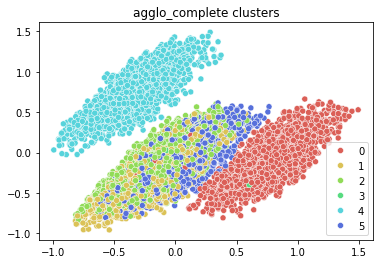

In [58]:
sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = agglo_complete_labels[:], palette=sns.color_palette("hls", 8))
plt.title('agglo_complete clusters')
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_23488\3213548407.py:1: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = gmm_labels[:], palette=sns.color_palette("hls", 8))


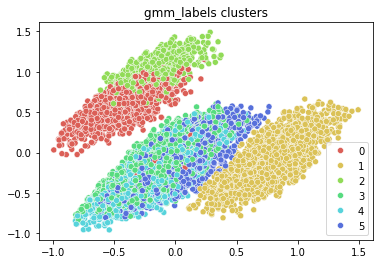

In [59]:
sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = gmm_labels[:], palette=sns.color_palette("hls", 8))
plt.title('gmm_labels clusters')
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_23488\3881454480.py:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = dbscan_labels[:], palette=sns.color_palette("hls", 8))


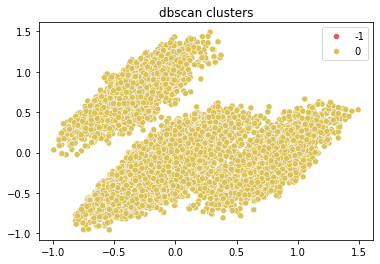

In [60]:
sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = dbscan_labels[:], palette=sns.color_palette("hls", 8))
plt.title('dbscan clusters')
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_23488\2907913983.py:1: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = kmedoids_labels[:], palette=sns.color_palette("hls", 8))


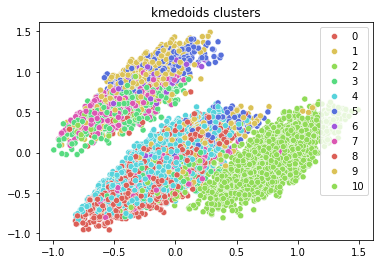

In [61]:
sns.scatterplot(x = result[:, 0], y = result[:, 1], hue = kmedoids_labels[:], palette=sns.color_palette("hls", 8))
plt.title('kmedoids clusters')
plt.show()

In [64]:
from sklearn.manifold import TSNE
# Skorzystam z labowej funkcji
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 9))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    ax.axis('off')
    ax.axis('tight')

    # add labels
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 0.257s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.434719
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.346695


c:\Users\micha\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\micha\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


[t-SNE] KL divergence after 1000 iterations: 1.547153


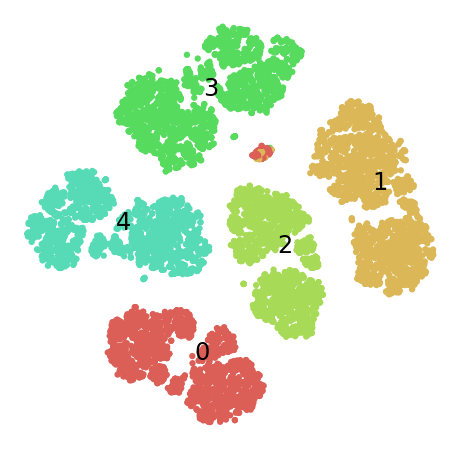

In [81]:
X = np.vstack([sample_df[kmeans_labels==i]
               for i in range(5)])
y = np.hstack([labels[kmeans_labels==i]
               for i in range(5)])
random_state = 1500100900
tSNE = TSNE(random_state=random_state, verbose=1)
digits_proj = tSNE.fit_transform(X)

scatter(digits_proj, y)
plt.show()